In [1]:
import tensorflow as tf
keras=tf.keras
layers=keras.layers

In [2]:
#GAN对抗生成网络包含两个部分，包括生成器和判别器
#生成器通过输入向量制造假的样本集，目标是让判别器无法判断
#最终的目标是让生成器生成的数据，判别器无法判断最终只能给出二分类的随机猜测的数据

In [3]:
#对于给定的真实图片判别器希望是1，给定生成为0，生成器希望判别器将自己的数据打上1
#最终结果判别器无法判别图片是否是生成器的图片吗，那么通过这样的对抗博弈，我们最终得到了图像生成网络
#首先我们给定图像噪声，一个随机分布，我们就会产生一个随机分布网络，那么产生的图片也是随机的图片
#GAN的应用领域，在图像生成领域，图像增强，风格化，艺术的图像创造

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
(x_train,y_train),_=keras.datasets.mnist.load_data()
x_train=tf.expand_dims(x_train,axis=-1)
x_train.shape

TensorShape([60000, 28, 28, 1])

In [6]:
x_train.dtype

tf.uint8

In [7]:
x_train=tf.cast(x_train,tf.float32)
x_train=x_train/255.0


In [8]:
x_train.dtype

tf.float32

In [9]:
x_train=x_train*2-1

In [10]:
BATCH_SIZE=25
BUFFER_SIZE=60000
dataset=tf.data.Dataset.from_tensor_slices(x_train)

In [11]:
dataset=dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset

<BatchDataset shapes: (None, 28, 28, 1), types: tf.float32>

In [12]:
def generator_model():
    model=keras.Sequential()
    model.add(layers.Dense(256,input_shape=(100,),use_bias=False))#生成器一般都不使用BIAS
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(512,use_bias=False))#生成器一般都不使用BIAS
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(28*28*1,use_bias=False,activation='tanh'))#生成器一般都不使用BIAS
    model.add(layers.BatchNormalization())
    model.add(layers.Reshape((28,28,1)))
    return model

In [13]:
def discriminator_model():
    model=keras.Sequential()
    model.add(layers.Flatten())
    model.add(layers.Dense(512,use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(256,use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(1))
    return model




In [14]:
loss_object=keras.losses.BinaryCrossentropy(from_logits=True)


In [15]:
def discriminator_loss(real_image,fake_image):
    real_loss=loss_object(tf.ones_like(real_image),real_image)
    fake_loss=loss_object(tf.zeros_like(fake_image),fake_image)
    return real_loss+fake_loss
    

In [16]:
def generator_loss(fake_image):
    fake_loss=loss_object(tf.ones_like(fake_image),fake_image)
    return fake_loss

In [17]:
generator_opt=keras.optimizers.Adam(1e-4)
discriminator_opt=keras.optimizers.Adam(1e-4)


In [18]:
EPOCHS=100
noise_dim=100
num=16
seed=tf.random.normal(shape=([num,noise_dim]))

In [19]:
gen_model=generator_model()
dis_model=discriminator_model()

In [29]:
@tf.function
def train_step(images):
    noise=tf.random.normal([BATCH_SIZE,noise_dim])
    with tf.GradientTape() as gentape, tf.GradientTape() as disctape:
        real_output=dis_model(images,training=True)
        fake_image=gen_model(noise,training=True)
        fake_output=dis_model(fake_image,training=True)
        gen_loss=generator_loss(fake_output)
        dis_loss=discriminator_loss(real_output,fake_output)
    grad_gen=gentape.gradient(gen_loss,gen_model.trainable_variables)
    grad_dis=disctape.gradient(dis_loss,dis_model.trainable_variables)
    generator_opt.apply_gradients(zip(grad_gen,gen_model.trainable_variables))
    discriminator_opt.apply_gradients(zip(grad_dis,dis_model.trainable_variables))
    

In [30]:
#在每次训练后绘图
def generate_plot_img(gen_model,test_noise):
    pre_img=gen_model(test_noise,training=False)
    fig=plt.figure(figsize=(4,4))
    for i in range(pre_img.shape[0]):
        plt.subplot(4,4,i+1)
        plt.imshow((pre_img[i, :, :, 0]+1)/2,cmap='gray')
        plt.axis('off')
    plt.show()#将16张图片一起显示出来

In [31]:
def train(dataset, epochs):
    for epoch in range(epochs):
        for img in dataset:
            train_step(img)
            print('-',end='')
        generate_plot_img(gen_model,seed)


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

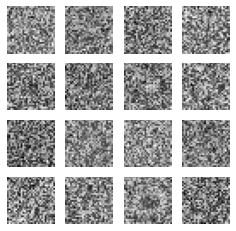

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

KeyboardInterrupt: 

In [32]:
train(dataset,EPOCHS)